In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data
import pandas as pd
import numpy as np
import acquire

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
print('Success')

Success


In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

1. print the first 3 rows
2. print the number of rows and columns (shape)
3. print the column names
4. print the data type of each column
5. print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [2]:
df_iris = data('iris') 
df_iris.head(3)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [3]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [4]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [5]:
df_iris.describe()
# Would you recommend rescaling the data based on these statistics? - No

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

1. assign the first 100 rows to a new dataframe, df_excel_sample
2. print the number of rows of your original dataframe
3. print the first 5 column names
4. print the column names that have a data type of object
5. compute the range for each of the numeric variables.

In [6]:
sheet_url = 'https://docs.google.com/spreadsheets/d/16tPJXOKksadffKXGIQnSgdckinr4hs-pMzJgsR8B5EQ/edit#gid=96538250'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_excel = pd.read_csv(csv_export_url)
df_excel['tenure'] = round(df_excel['total_charges']/df_excel['monthly_charges'], 0)
df_excel['tenure'].fillna(0, inplace = True)
df_excel.head(1)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.3,No,9.0


In [7]:
df_excel_sample = df_excel.head(100)

In [8]:
len(df_excel.index)

7049

In [9]:
df_excel.columns[0:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [10]:
list(df_excel.select_dtypes(include=['object']).columns)

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [11]:
spread = df_excel[['monthly_charges', 'total_charges', 'tenure']].describe().transpose()
spread['range'] = spread['max'] - spread['min']
spread[['range']]

,range
monthly_charges,100.5
total_charges,8666.0
tenure,79.0


Read the data from this google sheet into a dataframe, df_google

1. print the first 3 rows
2. print the number of rows and columns
3. print the column names
4. print the data type of each column
5. print the summary statistics for each of the numeric variables
6. print the unique values for each of your categorical variables

In [12]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [13]:
df_google.shape

(891, 12)

In [14]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
df_google[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [17]:
print(f"Survived = {df_google['Survived'].unique()}")
print(f"Pclass = {df_google['Pclass'].unique()}")
print(f"Embarked = {df_google['Embarked'].unique()}")

Survived = [0 1]
Pclass = [3 1 2]
Embarked = ['S' 'C' 'Q' nan]


# Iris Data

* Use the function defined in acquire.py to load the iris data.
* Drop the species_id and measurement_id columns.
* Rename the species_name column to just species.
* Create dummy variables of the species name.
* Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.


In [107]:
import acquire

def prep_iris():
    import acquire
    iris = acquire.get_iris_data()
    iris.drop(columns=['species_id', 'measurement_id', 'species_id.1'], inplace = True)
    iris.rename(columns={"species_name":"species" }, inplace = True)
    iris_dummies = pd.get_dummies(iris['species'])
    iris = pd.concat([iris, iris_dummies], axis=1)
    iris['petal_area'] = iris['petal_length'] * iris['petal_width']
    iris['sepal_area'] = iris['sepal_length'] * iris['sepal_width']
    return iris

prep_iris()


,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica,petal_area,sepal_area
0,setosa,5.1,3.5,1.4,0.2,1,0,0,0.28,17.85
1,setosa,4.9,3.0,1.4,0.2,1,0,0,0.28,14.70
2,setosa,4.7,3.2,1.3,0.2,1,0,0,0.26,15.04
3,setosa,4.6,3.1,1.5,0.2,1,0,0,0.30,14.26
4,setosa,5.0,3.6,1.4,0.2,1,0,0,0.28,18.00
5,setosa,5.4,3.9,1.7,0.4,1,0,0,0.68,21.06
6,setosa,4.6,3.4,1.4,0.3,1,0,0,0.42,15.64
7,setosa,5.0,3.4,1.5,0.2,1,0,0,0.30,17.00
8,setosa,4.4,2.9,1.4,0.2,1,0,0,0.28,12.76
9,setosa,4.9,3.1,1.5,0.1,1,0,0,0.15,15.19


# Titanic Data

* Use the function you defined in acquire.py to load the titanic data set.
* Handle the missing values in the embark_town and embarked columns.
* Remove the deck column.
* Create a dummy variable of the embarked column.
* Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?
* Fill the missing values in age. The way you fill these values is up to you. Consider the tradeoffs of different methods.
* Create a function named prep_titanic that accepts the untransformed titanic data, and returns the data with the transformations above applied.

In [19]:
def prep_titanic():
    titanic = acquire.get_titanic_data()
    titanic = titanic[~titanic.embark_town.isnull()]
    titanic.drop(columns=['deck'])
    titanic_dummies = pd.get_dummies(titanic['embarked'])
    titanic = pd.concat([titanic, titanic_dummies], axis=1)
    scaler = MinMaxScaler()
    scaler = MinMaxScaler()
    titanic[['age', 'fare']] = scaler.fit_transform(titanic[['age', 'fare']])
    imputer = SimpleImputer(strategy = 'mean')
    imputer = imputer.fit(titanic[['age']])
    titanic[['age']] = imputer.transform(titanic[['age']])
    return titanic


prep_titanic()




,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,C,Q,S
0,0,0,3,male,0.271174,1,0,0.014151,S,Third,NaN,Southampton,0,0,0,1
1,1,1,1,female,0.472229,1,0,0.139136,C,First,C,Cherbourg,0,1,0,0
2,2,1,3,female,0.321438,0,0,0.015469,S,Third,NaN,Southampton,1,0,0,1
3,3,1,1,female,0.434531,1,0,0.103644,S,First,C,Southampton,0,0,0,1
4,4,0,3,male,0.434531,0,0,0.015713,S,Third,NaN,Southampton,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0.334004,0,0,0.025374,S,Second,NaN,Southampton,1,0,0,1
887,887,1,1,female,0.233476,0,0,0.058556,S,First,B,Southampton,1,0,0,1
888,888,0,3,female,0.367204,1,2,0.045771,S,Third,NaN,Southampton,0,0,0,1
889,889,1,1,male,0.321438,0,0,0.058556,C,First,C,Cherbourg,1,1,0,0


# Iris dataset.

Split your data into train, test, and validate samples.

In [108]:
iris = prep_iris()
iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica,petal_area,sepal_area
0,setosa,5.1,3.5,1.4,0.2,1,0,0,0.28,17.85
1,setosa,4.9,3.0,1.4,0.2,1,0,0,0.28,14.70
2,setosa,4.7,3.2,1.3,0.2,1,0,0,0.26,15.04
3,setosa,4.6,3.1,1.5,0.2,1,0,0,0.30,14.26
4,setosa,5.0,3.6,1.4,0.2,1,0,0,0.28,18.00


Text(0.5, 0, 'Setosa')

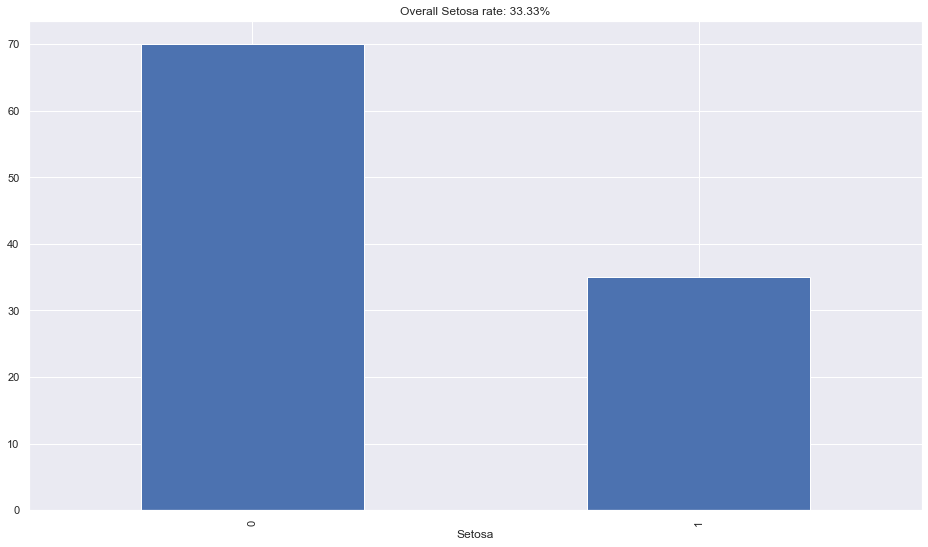

In [109]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

train, test = train_test_split(iris, test_size=.2, random_state=222, stratify=iris.species)
train, validate = train_test_split(iris, test_size=.3, random_state=222, stratify=iris.species)

train.setosa.value_counts().sort_index().plot.bar()
setosa_rate = train.setosa.mean()
plt.title(f"Overall Setosa rate: {setosa_rate:.2%}")
plt.xlabel('Setosa')

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

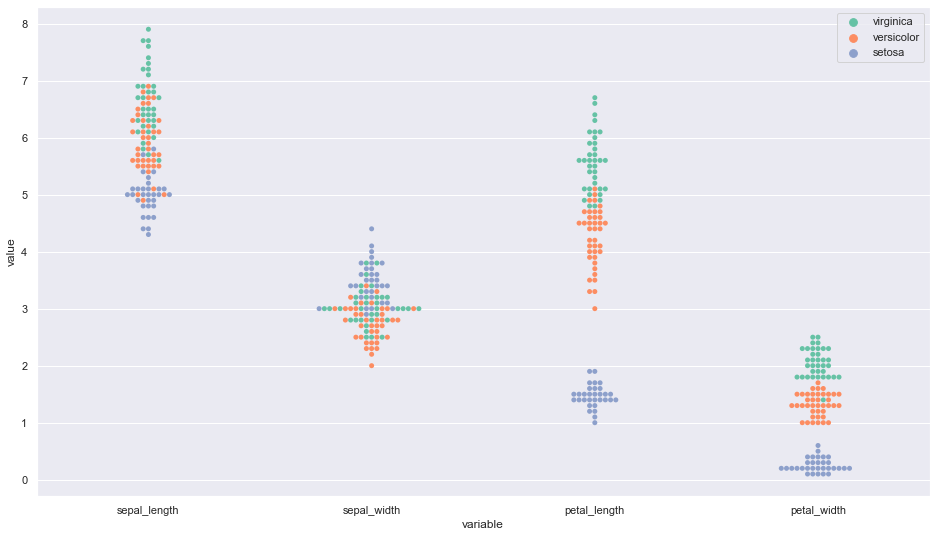

In [110]:
melted_iris = train.melt('species', ['sepal_length','sepal_width','petal_length','petal_width'])
sns.swarmplot(x="variable", y="value", data=melted_train, hue="species", palette="Set2")
plt.legend()

Create 4 subplots (2 rows x 2 columns) of scatterplots.

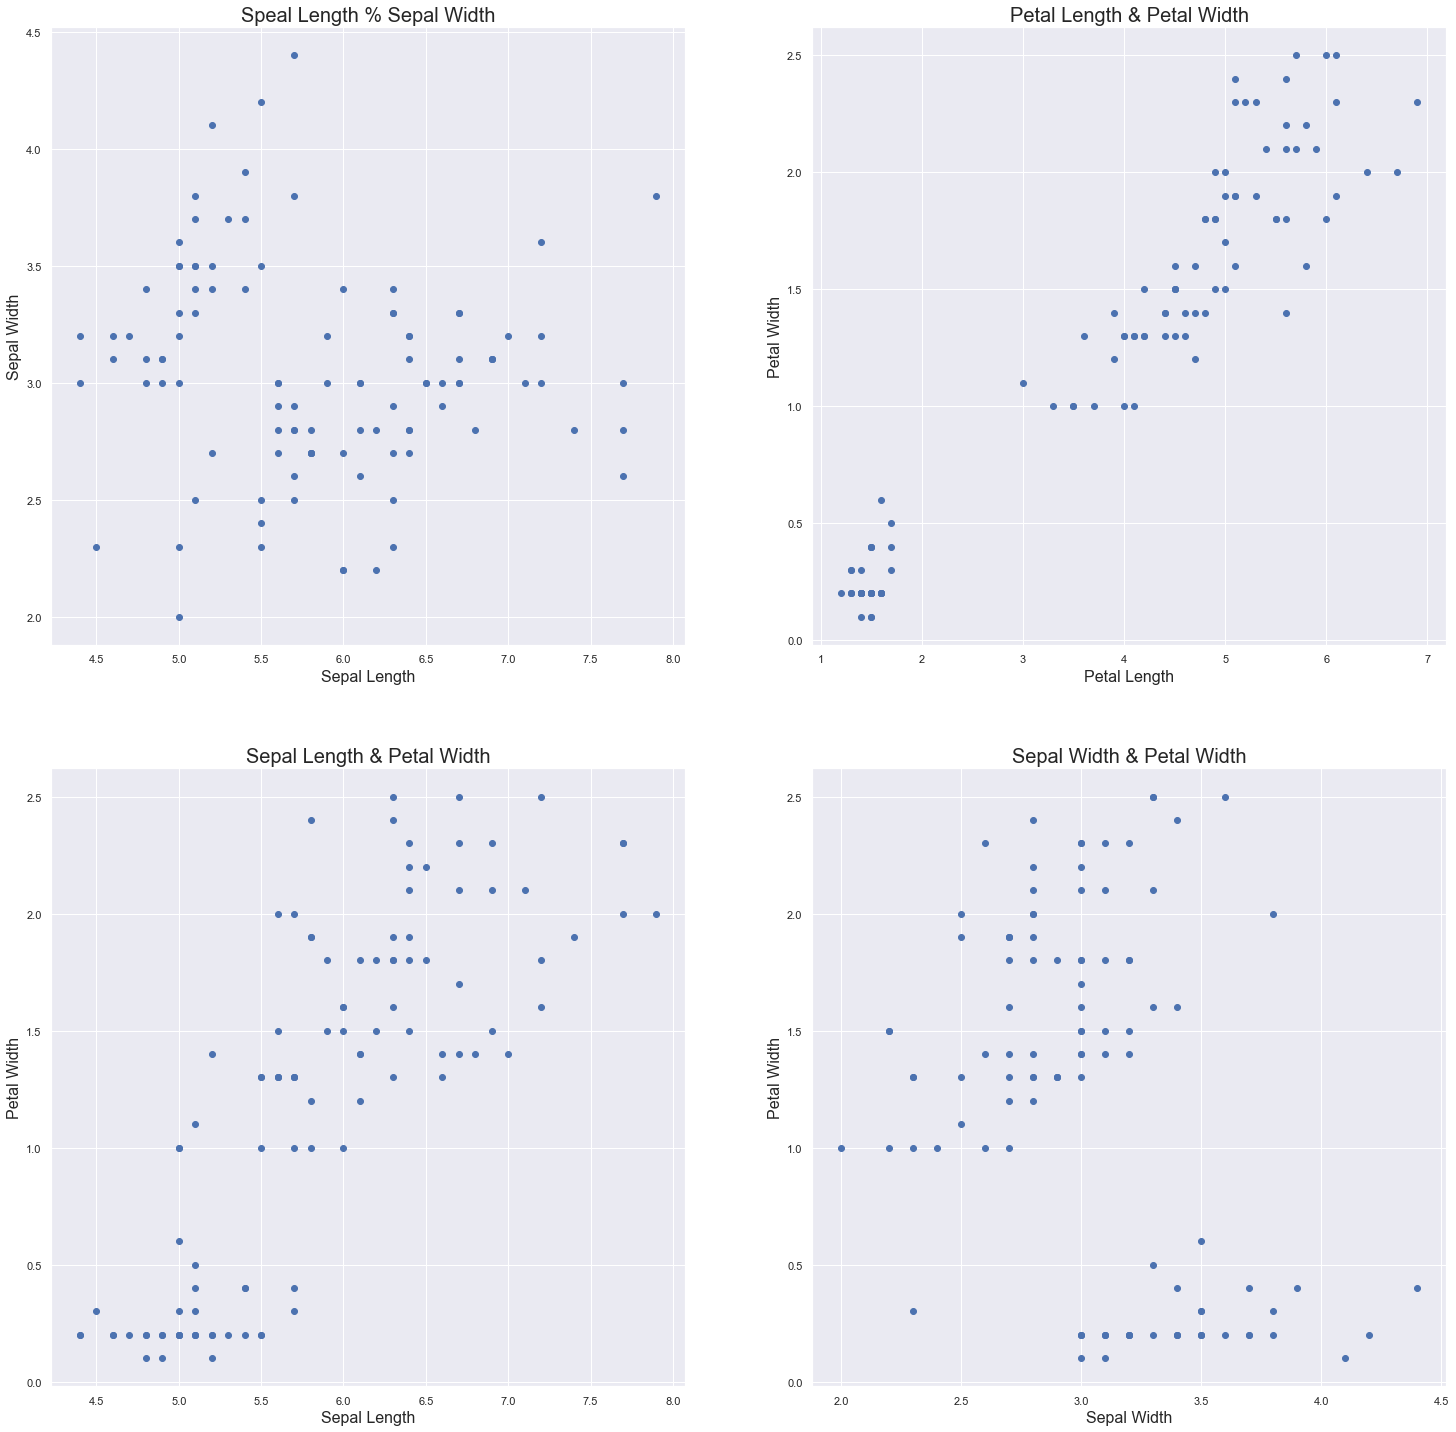

In [111]:
plt.figure(figsize = (25, 25))

plt.subplot(221)
plt.scatter(train['sepal_length'], train['sepal_width'])
plt.ylabel('Sepal Width', fontsize = 16)
plt.xlabel('Sepal Length', fontsize = 16)
plt.title('Speal Length % Sepal Width', fontsize = 20)

# the second subplot
plt.subplot(222)
plt.scatter(train['petal_length'], train['petal_width'])
plt.ylabel('Petal Width', fontsize = 16)
plt.xlabel('Petal Length', fontsize = 16)
plt.title('Petal Length & Petal Width', fontsize = 20)

plt.subplot(223)
plt.scatter(train['sepal_length'], train['petal_width'])
plt.ylabel('Petal Width', fontsize = 16)
plt.xlabel('Sepal Length', fontsize = 16)
plt.title('Sepal Length & Petal Width', fontsize = 20)

# the second subplot
plt.subplot(224)
plt.scatter(train['sepal_width'], train['petal_width'])
plt.ylabel('Petal Width', fontsize = 16)
plt.xlabel('Sepal Width', fontsize = 16)
plt.title('Sepal Width & Petal Width', fontsize = 20)

plt.show()

Create 4 subplots (2 rows x 2 columns) of scatterplots.

* sepal_length x sepal_width
* petal_length x petal_width
* sepal_area x petal_area
* sepal_length x petal_length
* What are your takeaways?

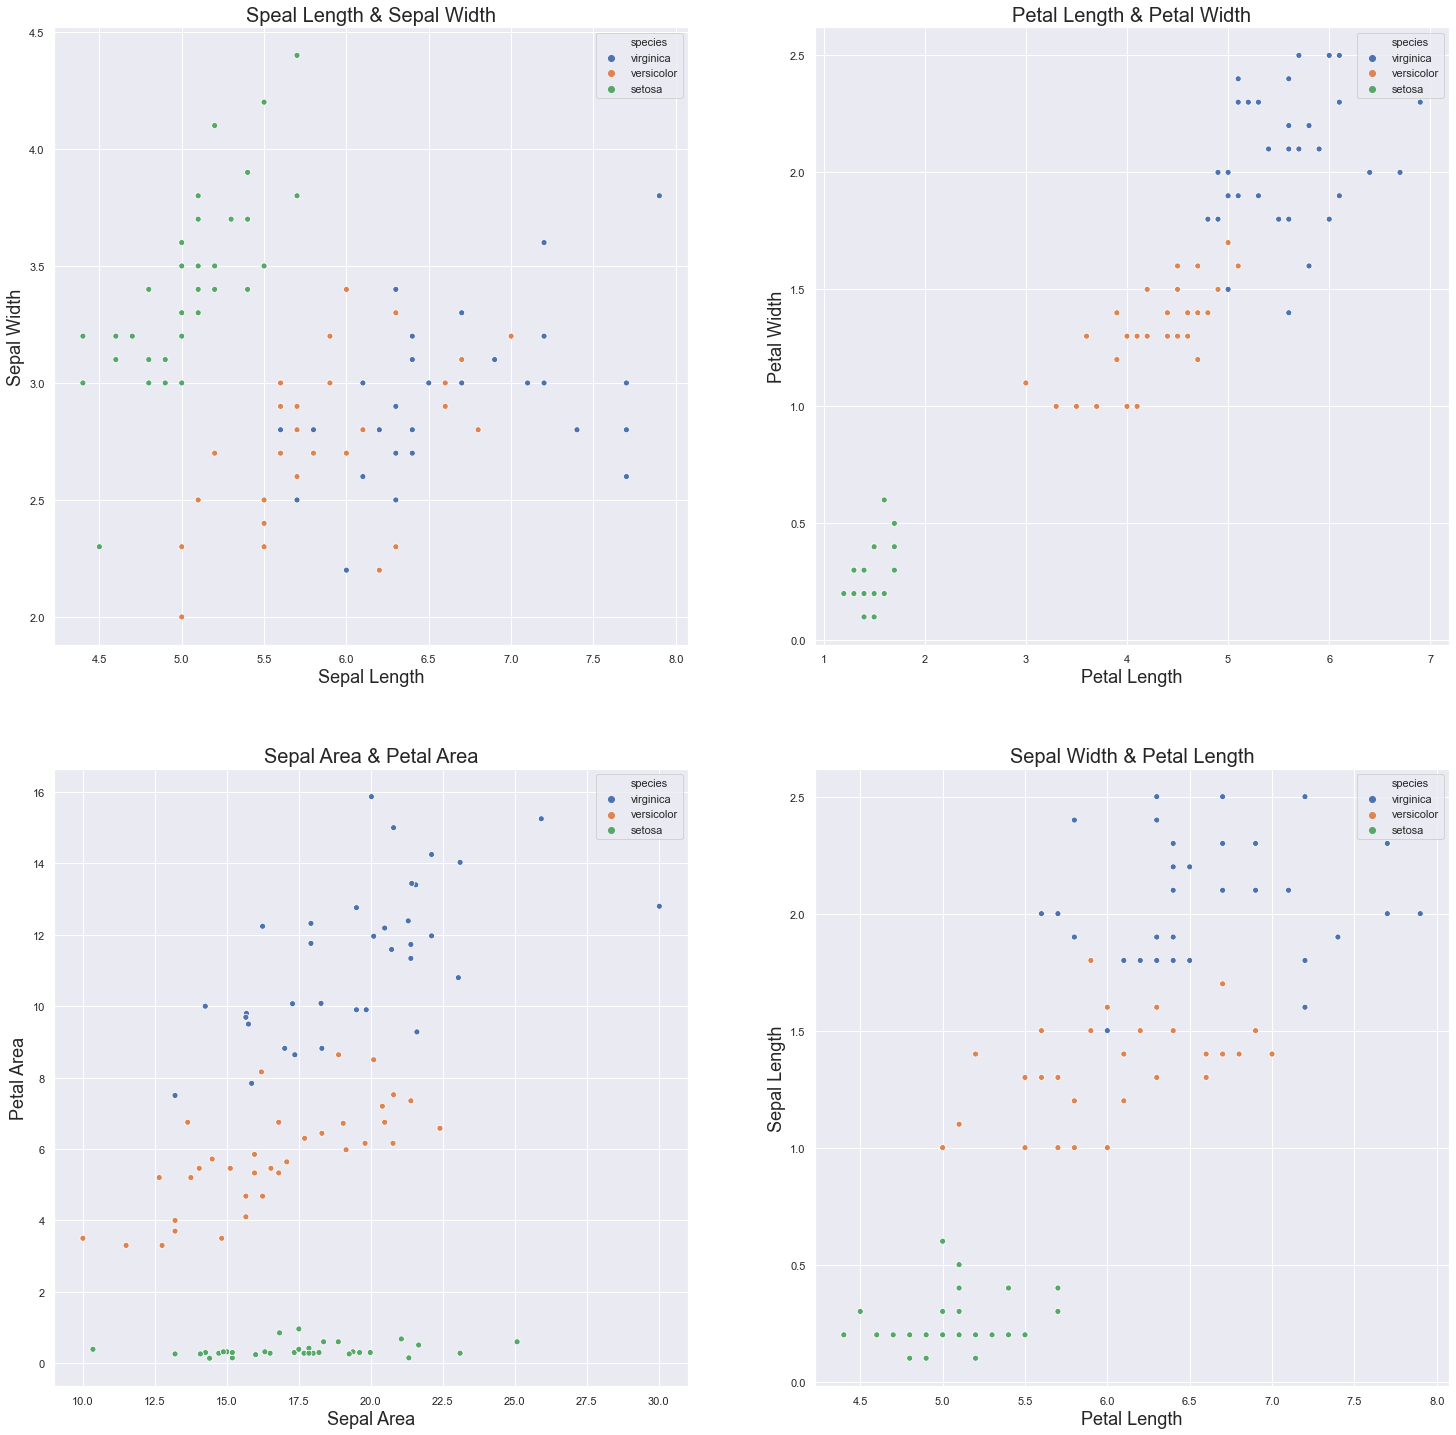

In [116]:
plt.figure(figsize = (25, 25))

plt.subplot(221)
sns.scatterplot(data=train, x="sepal_length", y="sepal_width", hue='species')
plt.ylabel('Sepal Width', fontsize = 18)
plt.xlabel('Sepal Length', fontsize = 18)
plt.title('Speal Length & Sepal Width', fontsize = 20)

# the second subplot
plt.subplot(222)
sns.scatterplot(data=train, x="petal_length", y="petal_width", hue='species')
plt.ylabel('Sepal Width', fontsize = 18)
plt.ylabel('Petal Width', fontsize = 18)
plt.xlabel('Petal Length', fontsize = 18)
plt.title('Petal Length & Petal Width', fontsize = 20)

plt.subplot(223)
sns.scatterplot(data=train, x='sepal_area', y='petal_area', hue='species')
plt.ylabel('Sepal Width', fontsize = 18)
plt.ylabel('Petal Area', fontsize = 18)
plt.xlabel('Sepal Area', fontsize = 18)
plt.title('Sepal Area & Petal Area', fontsize = 20)

# the second subplot
plt.subplot(224)
sns.scatterplot(data=train, x='sepal_length', y='petal_width', hue='species')
plt.ylabel('Sepal Length', fontsize = 18)
plt.xlabel('Petal Length', fontsize = 18)
plt.title('Sepal Width & Petal Length', fontsize = 20)

plt.show()

# Sepal Length & Width aren't correlated execpt for setosa.
# There is a positive correlation between petal length and petal width and a clear clustering based on speices. 
# There is a positive correlation between sepal area and petal area and a clear clustering based on speices. 
# There is a positive correlation between speal lengtha and petal length and a clear clustering based on speices. 

Create a heatmap of each variable layering correlation coefficient on top.

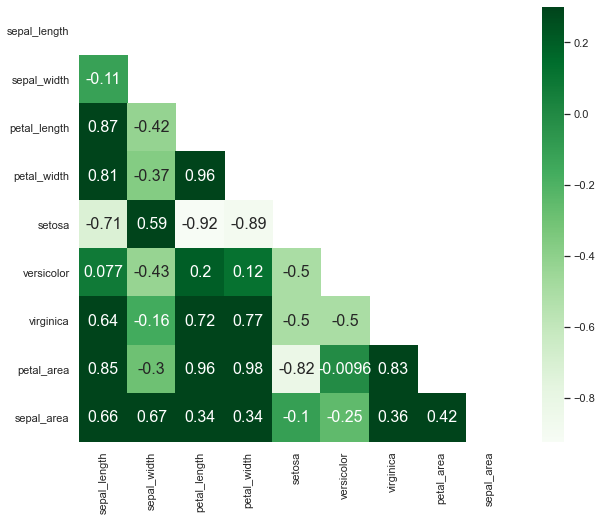

In [117]:
plt.rc('figure', figsize=(16,9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=16)

sns.set(rc={'figure.figsize': (16,9),
            'font.size': 16})

corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot = True, cmap='Greens')



Create a scatter matrix visualizing the interaction of each variable

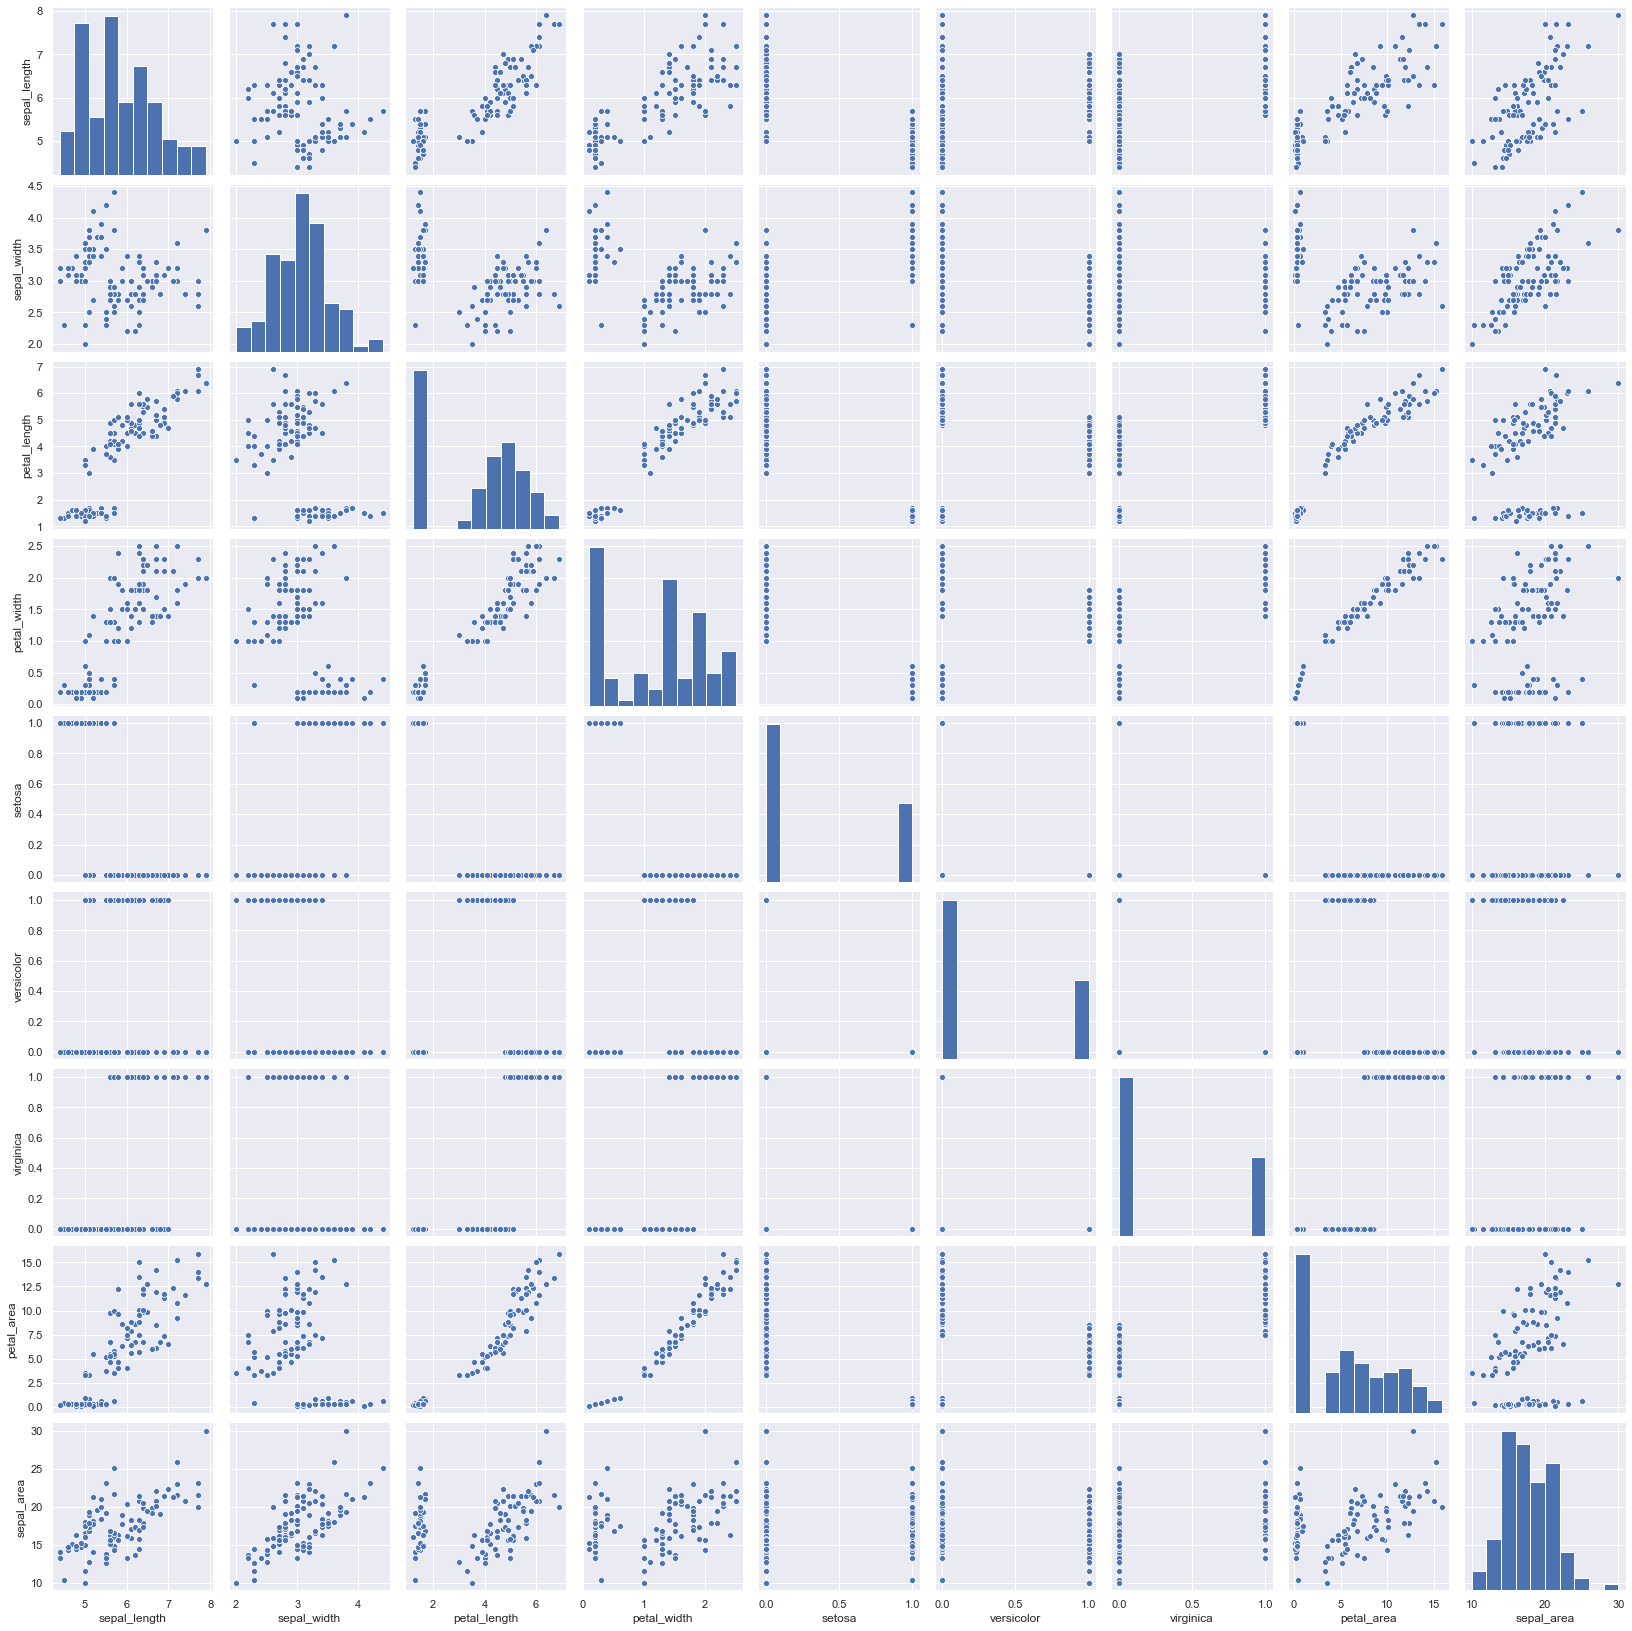

In [121]:
sns.pairplot(train)

Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

$H0$:  Mean of sepal_length for virginica = Mean of sepal_length for versicolor
Ha:  There is a significant difference between the mean of virginica's and versicolor's sepal lengths
(35,)
(35,)
0.2866722689075631
0.37986554621848756
T = 4.658392728125285, p/2= 7.652408217808935e-06
is p/2 < alpha?  True
is t > 0?  True
We reject $H_{0}$


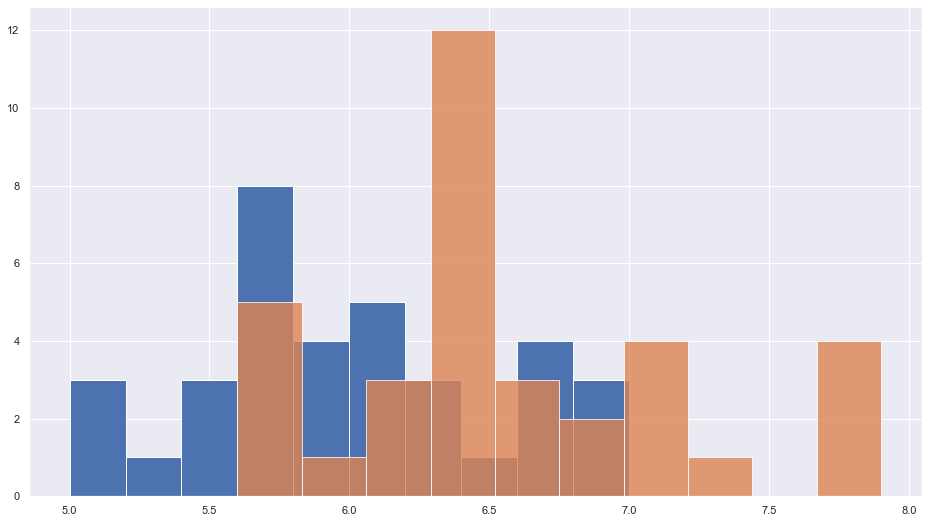

In [132]:
from scipy import stats

print("$H0$:  Mean of sepal_length for virginica = Mean of sepal_length for versicolor")
print("Ha:  There is a significant difference between the mean of virginica's and versicolor's sepal lengths")
virginica = train.loc[train['virginica'] == 1]
versicolor = train.loc[train['versicolor'] == 1]
alpha = .05
versicolor['sepal_length'].hist()
virginica['sepal_length'].hist(alpha=.8)
# of Observations
print(versicolor.sepal_length.shape)
print(virginica.sepal_length.shape)
# Variance (2 Sample T-Test)
print(versicolor.sepal_length.var())
print(virginica.sepal_length.var())
t, p = stats.ttest_ind(virginica.sepal_length, versicolor.sepal_length)
print(f"T = {t}, p/2= {p/2}")
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)
if p > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

What is your takeaway from this statistical testing?

Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

H0:  Mean of sepal_length for virginica = Mean of sepal_width for versicolor
Ha:  There is a significant difference between the mean of virginica's and versicolor's sepal widths
(35,)
(35,)
0.11946218487394955
0.10431932773109241
T = 2.1081712527193717, p/2= 0.01935204344442174
is p/2 < alpha?  True
is t > 0?  True
We reject $H_{0}$


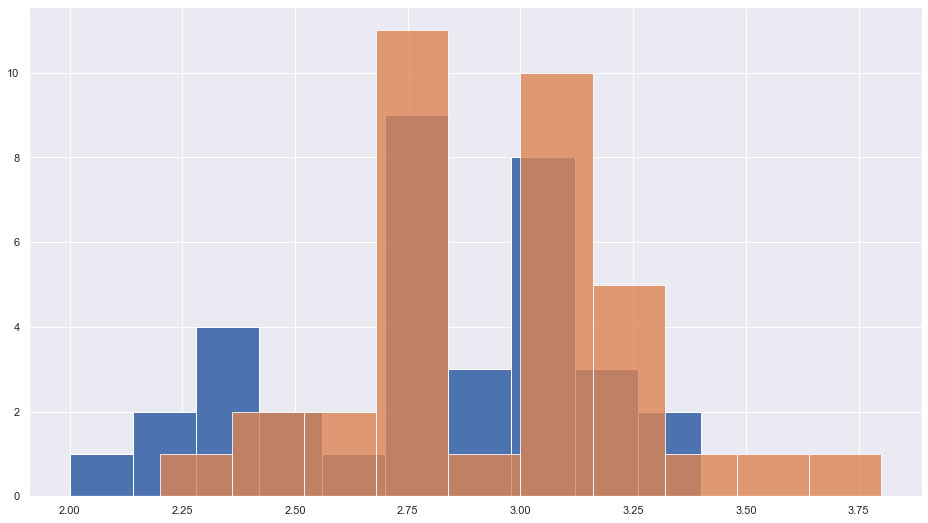

In [131]:
from scipy import stats

print("H0:  Mean of sepal_length for virginica = Mean of sepal_width for versicolor")
print("Ha:  There is a significant difference between the mean of virginica's and versicolor's sepal widths")
virginica = train.loc[train['virginica'] == 1]
versicolor = train.loc[train['versicolor'] == 1]
alpha = .05
versicolor['sepal_width'].hist()
virginica['sepal_width'].hist(alpha=.8)
# of Observations
print(versicolor.sepal_width.shape)
print(virginica.sepal_width.shape)
# Variance (2 Sample T-Test)
print(versicolor.sepal_width.var())
print(virginica.sepal_width.var())
t, p = stats.ttest_ind(virginica.sepal_width, versicolor.sepal_width)
print(f"T = {t}, p/2= {p/2}")
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)
if p > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

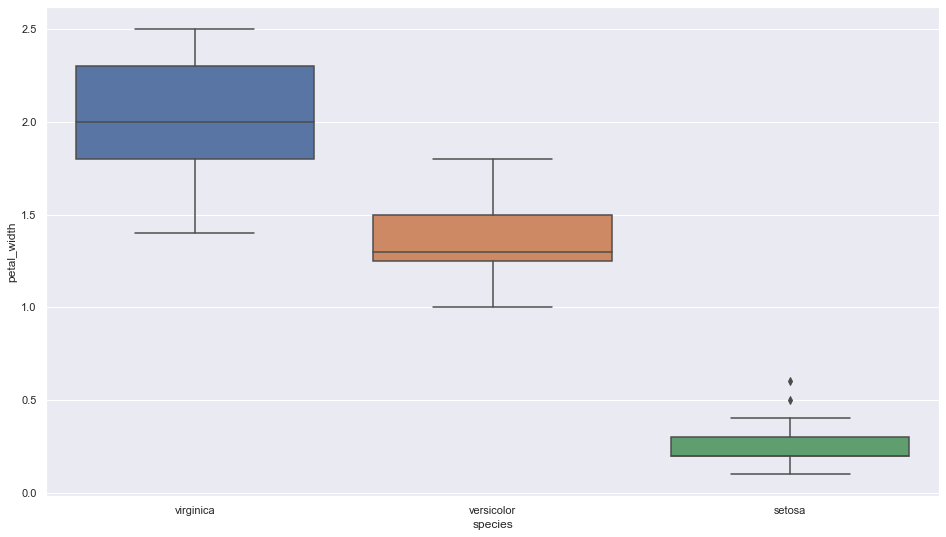

In [133]:
sns.boxplot(data=train, y='petal_width', x='species')